In [1]:
!pip install seaborn

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loandataset/loan_data_2007_2014.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
dataset_path = '/kaggle/input/loandataset/loan_data_2007_2014.csv'
# Baca dataset menggunakan Pandas
df = pd.read_csv(dataset_path)

/tmp/ipykernel_32/548259761.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


# Business Understanding

Kita sebagai seorang Datascience diminta untuk membuat model yang dapat memprediksi credit risk customer tersebut untuk menghindari kerugian perusahaan. Dataset terdiri dari berbagai customer yang sudah melakukan peminjaman beserta informasi kondisi kredit setiap customernya.<br><br>
*Goals* <br>
Membuat model yang dapat memprediksi credit risk customer tersebut untuk menghindari kerugian perusahaan<br>
*obejective*<br>
1. Menentukan data yang digunakan untuk modeling
2. Membuat segmentasi customer berdasarkan credit risk <br>

*Business Metrics*<br>
credit risk

# Dataset Collection

In [5]:
pd.set_option('display.max_columns', 500)

In [6]:
df.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Karena model yang dibuat adalah model untuk memprediksi credit risk cutomer, maka kolom kondisi customer setelah melakukan peminjaman di drop.

In [7]:
x = ['id','member_id','acc_now_delinq','addr_state','annual_inc','application_type',
     'collection_recovery_fee','collections_12_mths_ex_med','delinq_2yrs','desc','emp_length','emp_title','funded_amnt',
     'grade','sub_grade','home_ownership','initial_list_status','installment','int_rate','issue_d','loan_status','pub_rec',
     'purpose','term','title','url','zip_code']
df= df[x]

# Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          466285 non-null  int64  
 1   member_id                   466285 non-null  int64  
 2   acc_now_delinq              466256 non-null  float64
 3   addr_state                  466285 non-null  object 
 4   annual_inc                  466281 non-null  float64
 5   application_type            466285 non-null  object 
 6   collection_recovery_fee     466285 non-null  float64
 7   collections_12_mths_ex_med  466140 non-null  float64
 8   delinq_2yrs                 466256 non-null  float64
 9   desc                        125983 non-null  object 
 10  emp_length                  445277 non-null  object 
 11  emp_title                   438697 non-null  object 
 12  funded_amnt                 466285 non-null  int64  
 13  grade         

Dataset memiliki 466285 baris  dan memiliki 37 kolom, dataset memiliki 2 kolom identitas yaitu id dan member_id.

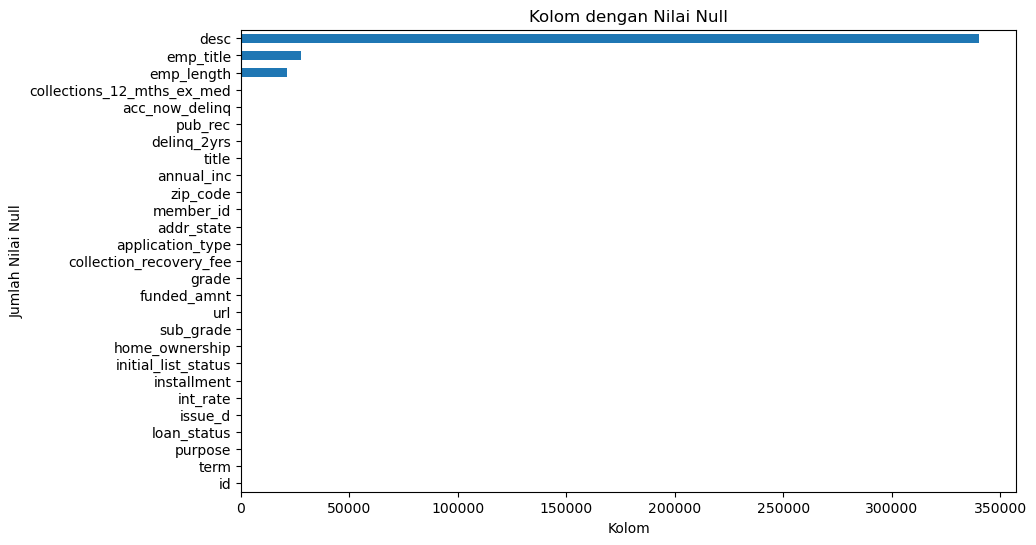

In [9]:
# Menghitung jumlah nilai null pada setiap kolom
jumlah_null = df.isnull().sum()

# Mengurutkan jumlah nilai null secara menurun
urutan_null = jumlah_null.sort_values(ascending=True)

# Mengambil 10 kolom dengan nilai null terbanyak
top_10_null = urutan_null.tail(30)

# Membuat grafik batang
plt.figure(figsize=(10, 6))
top_10_null.plot(kind='barh')
plt.title('Kolom dengan Nilai Null')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Nilai Null')
#plt.xticks(rotation=45)
plt.show()


Pada dataset, terdapat beberapa kolom yang memiliki nilai kosong dengan jumlah cukup banyak dan ada beberapa kolom yang sama sekali tidak memiliki nilai didalamnya, hal ini harus ditinjau lebih lanjut untuk menangani banyak nilai kosong pada dataset.

In [10]:
df.duplicated().sum()

0

Data tidak memiliki nilai duplikat.

## Analisis Univariate dan Bivariate

### Univariate

#### Numeric

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3639987.00,10107897.00,20731209.00,38098114.00
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4379705.00,11941075.00,23001541.00,40860827.00
acc_now_delinq,466256.0,4.002093e-03,6.863680e-02,0.00,0.00,0.00,0.00,5.00
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,45000.00,63000.00,88960.00,7500000.00
collection_recovery_fee,466285.0,8.961534e+00,8.549144e+01,0.00,0.00,0.00,0.00,7002.19
collections_12_mths_ex_med,466140.0,9.085253e-03,1.086484e-01,0.00,0.00,0.00,0.00,20.00
delinq_2yrs,466256.0,2.846784e-01,7.973651e-01,0.00,0.00,0.00,0.00,29.00
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8000.00,12000.00,20000.00,35000.00
installment,466285.0,4.320612e+02,2.434855e+02,15.67,256.69,379.89,566.58,1409.99
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,10.99,13.66,16.49,26.06


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


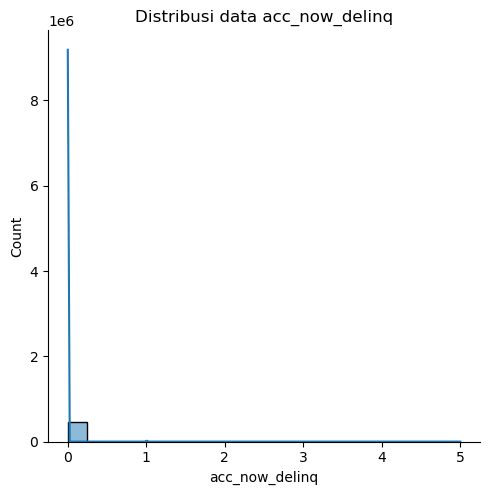

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


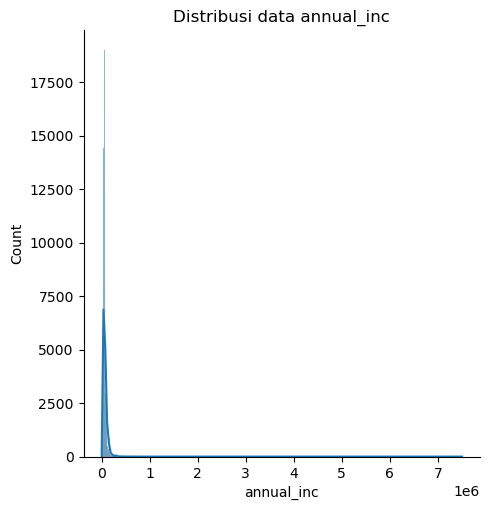

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


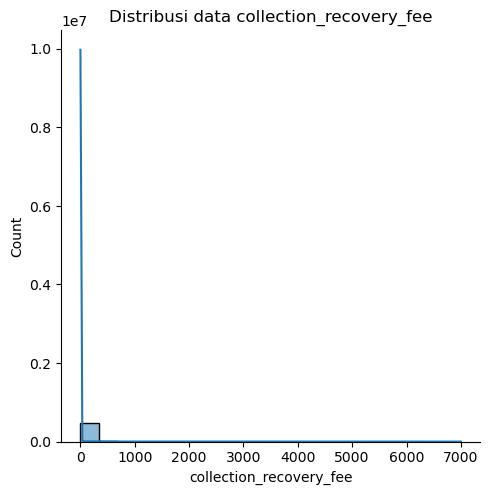

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


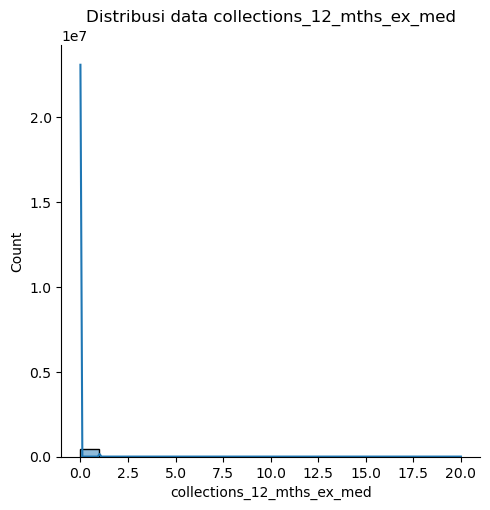

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


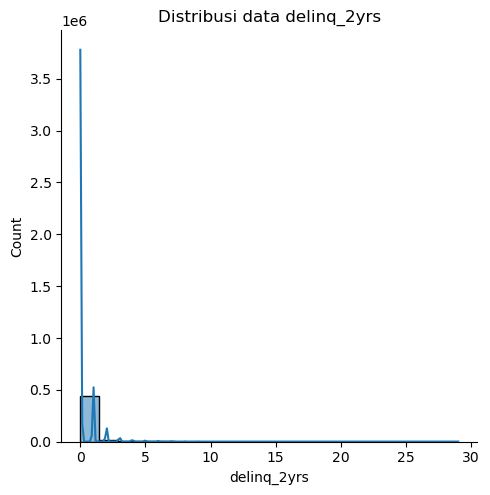

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


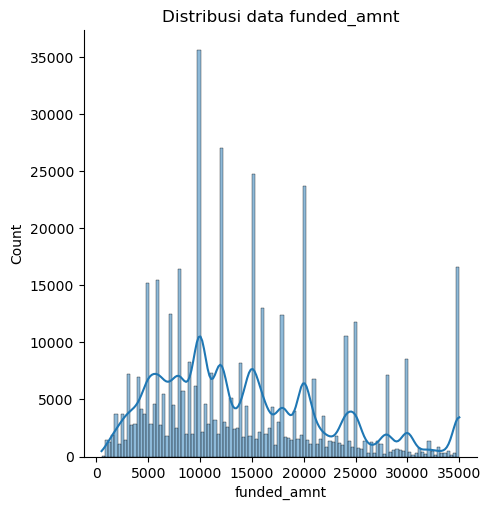

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


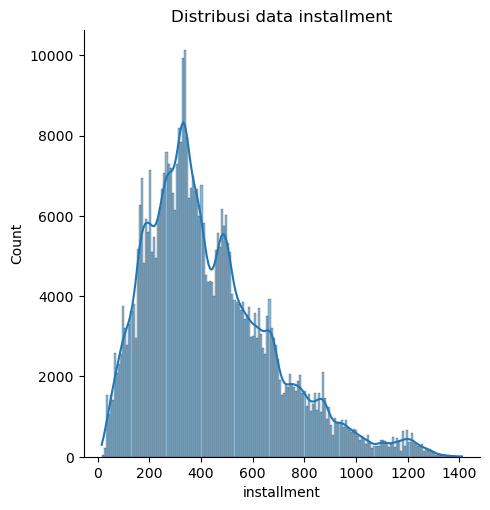

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


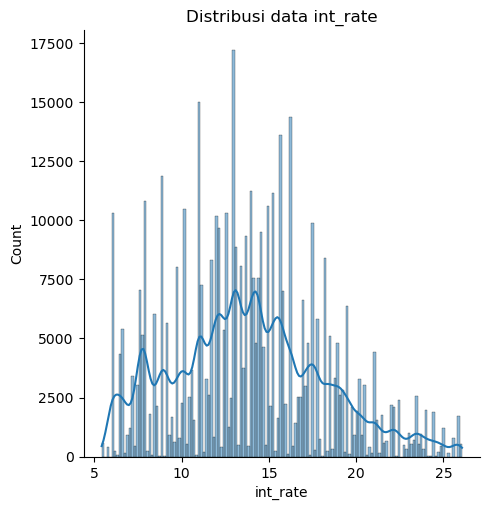

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


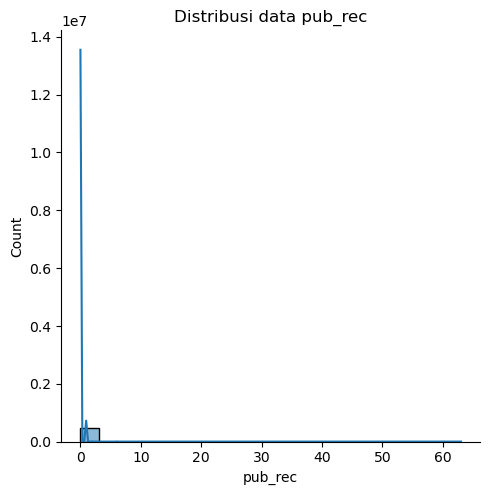

In [12]:
# Mengambil kolom dengan jenis numerik
kolom_numerik = df.select_dtypes(include='number')
drop = ['member_id','id']
kolom_numerik = kolom_numerik.drop(drop, axis=1)
# Melakukan plot untuk melihat skewness data
for kolom in kolom_numerik.columns:
    sns.displot(df[kolom], kde=True)
    plt.title(f'Distribusi data {kolom}')
    plt.show()


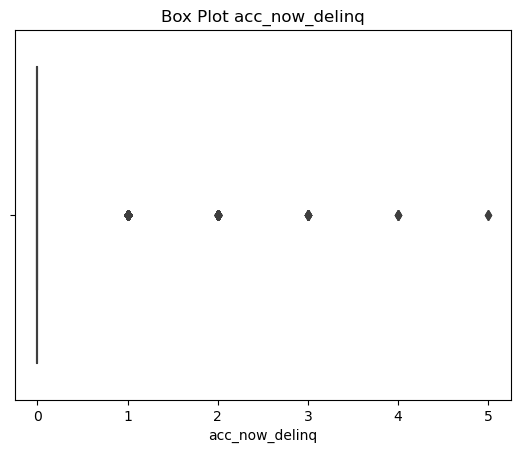

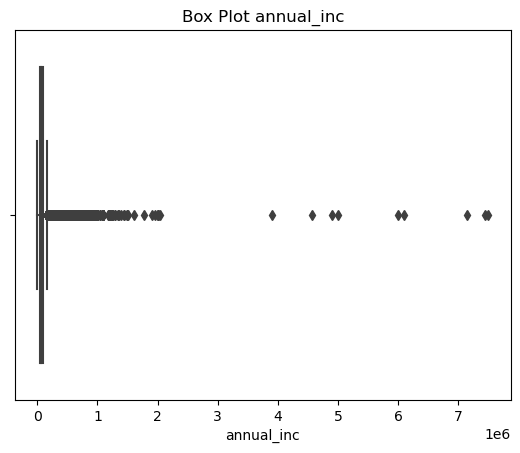

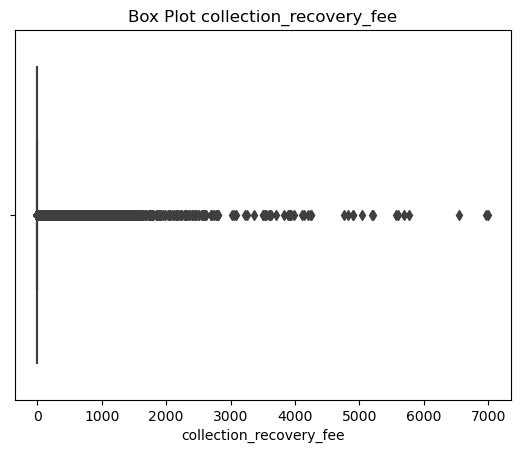

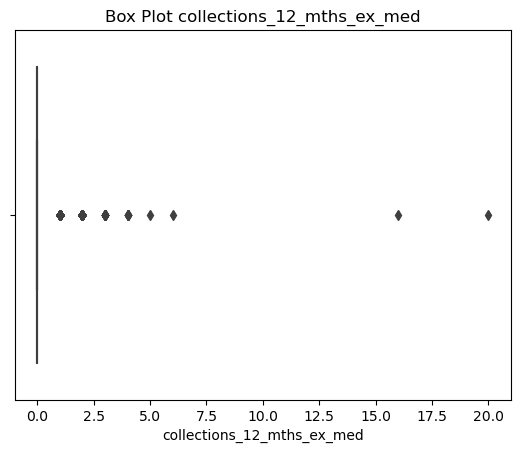

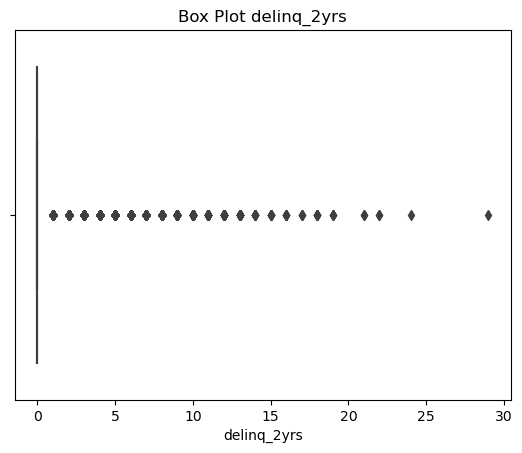

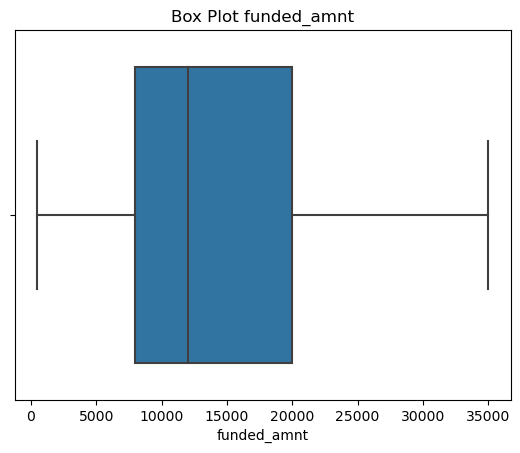

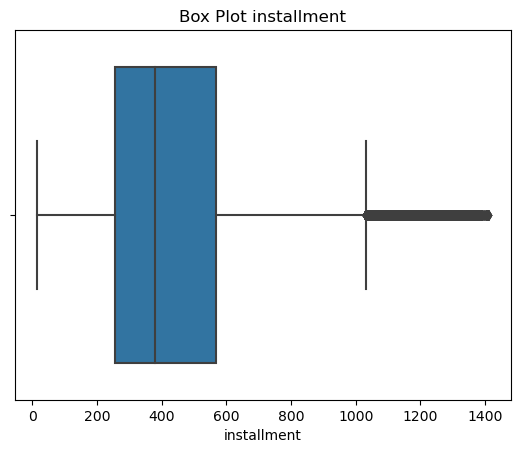

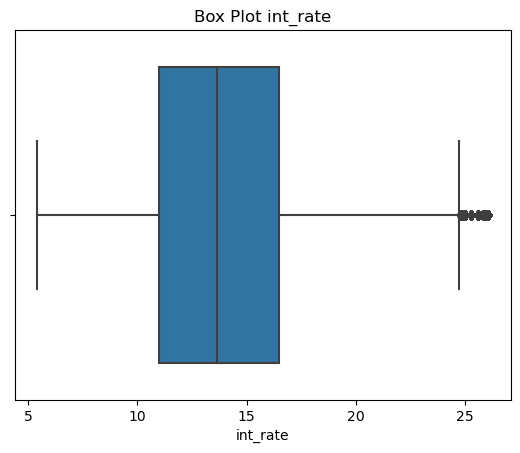

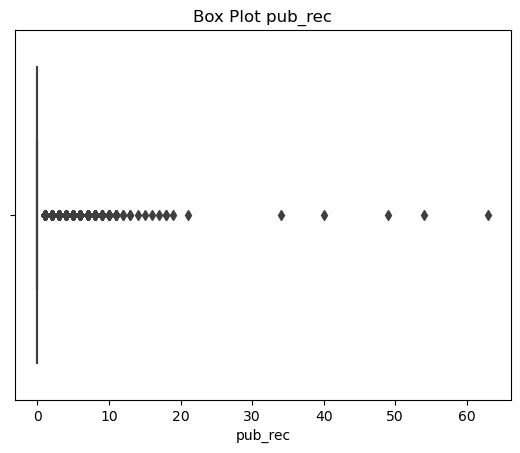

In [13]:
# Membuat box plot untuk setiap kolom numerik
for kolom in kolom_numerik.columns:
    sns.boxplot(x=df[kolom])
    plt.title(f'Box Plot {kolom}')
    plt.show()



#### Categorical

In [14]:
x = df.select_dtypes(include='object')
for kolom in x.columns:
    print(kolom + ":")
    print(x[kolom].nunique())

addr_state:
50
application_type:
1
desc:
124436
emp_length:
11
emp_title:
205475
grade:
7
sub_grade:
35
home_ownership:
6
initial_list_status:
2
issue_d:
91
loan_status:
9
purpose:
14
term:
2
title:
63099
url:
466285
zip_code:
888


kolom dengan high cardinality :
1. desc
2. url
3. emp_title
4. title
5. zip_code

kolo dengan nilai tunggal :
1. application_type

In [15]:
kolom_kategorikal = df.select_dtypes(include='object')
kolom_kategorikal.value_counts()
drop = ['desc','url','emp_title','title','zip_code','application_type']
kolom_kategorikal = kolom_kategorikal.drop(drop, axis=1)

In [16]:
kolom_kategorikal['issue_d']= kolom_kategorikal['issue_d'].str[:3]
kolom_kategorikal.head(4)

,addr_state,emp_length,grade,sub_grade,home_ownership,initial_list_status,issue_d,loan_status,purpose,term
0,AZ,10+ years,B,B2,RENT,f,Dec,Fully Paid,credit_card,36 months
1,GA,< 1 year,C,C4,RENT,f,Dec,Charged Off,car,60 months
2,IL,10+ years,C,C5,RENT,f,Dec,Fully Paid,small_business,36 months
3,CA,10+ years,C,C1,RENT,f,Dec,Fully Paid,other,36 months


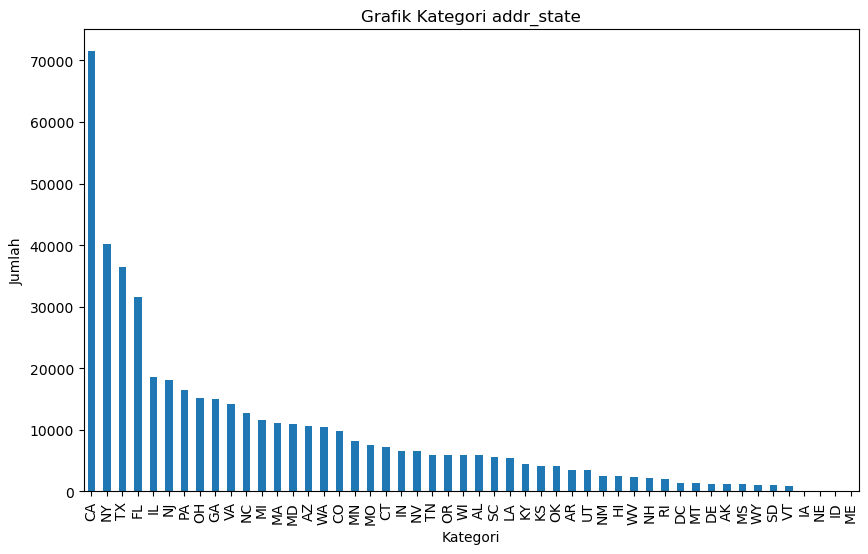

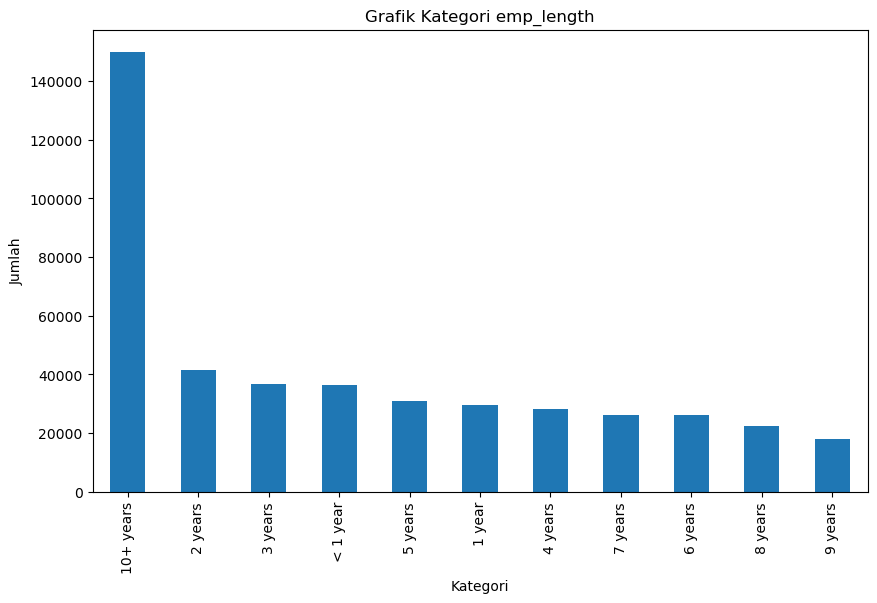

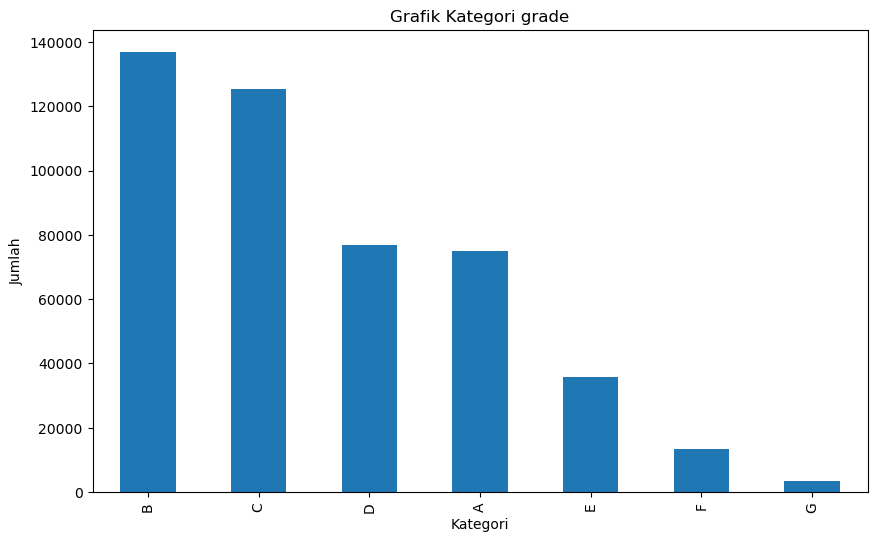

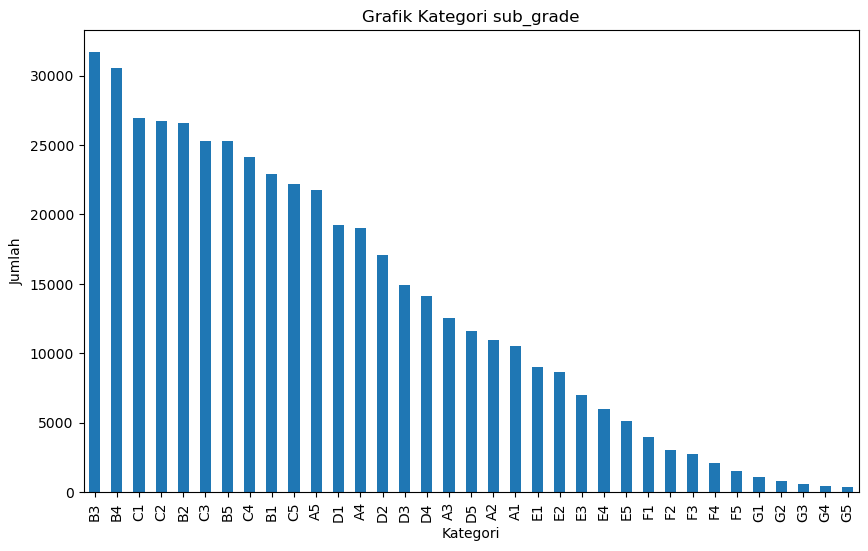

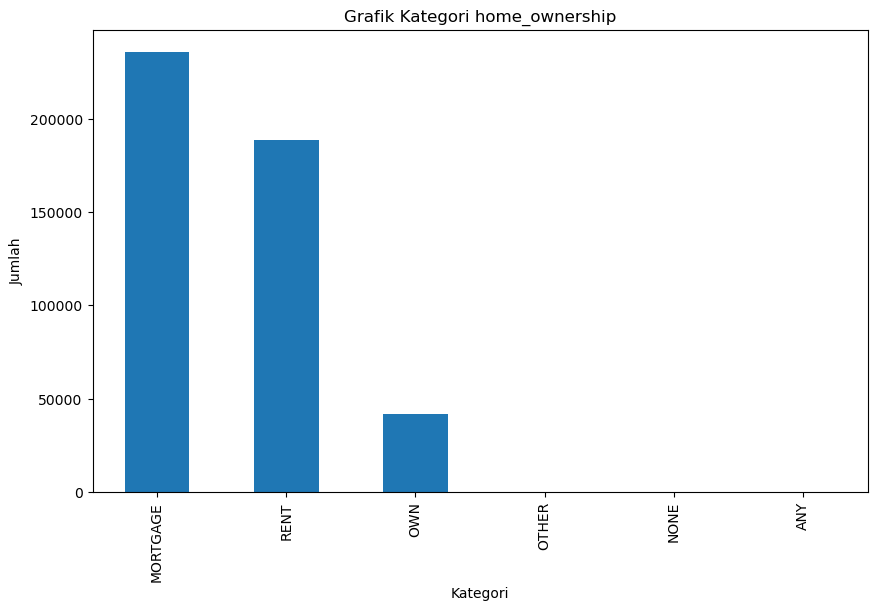

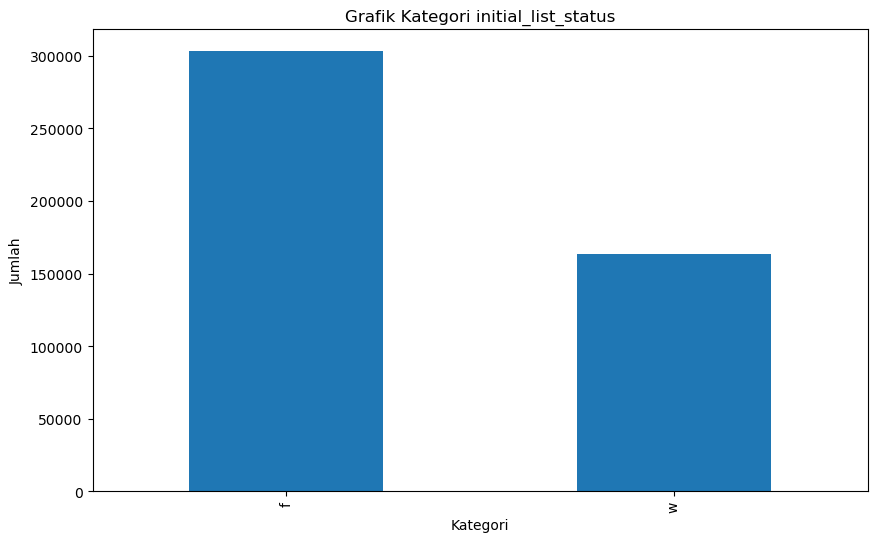

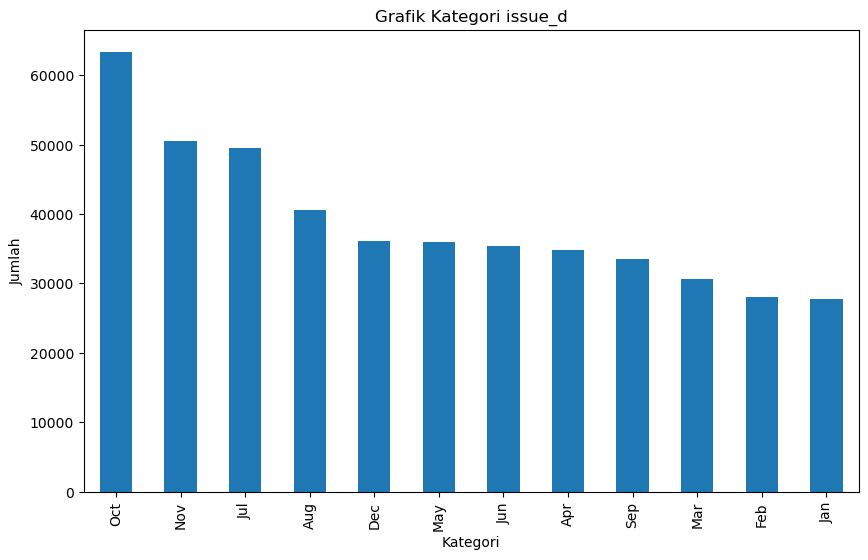

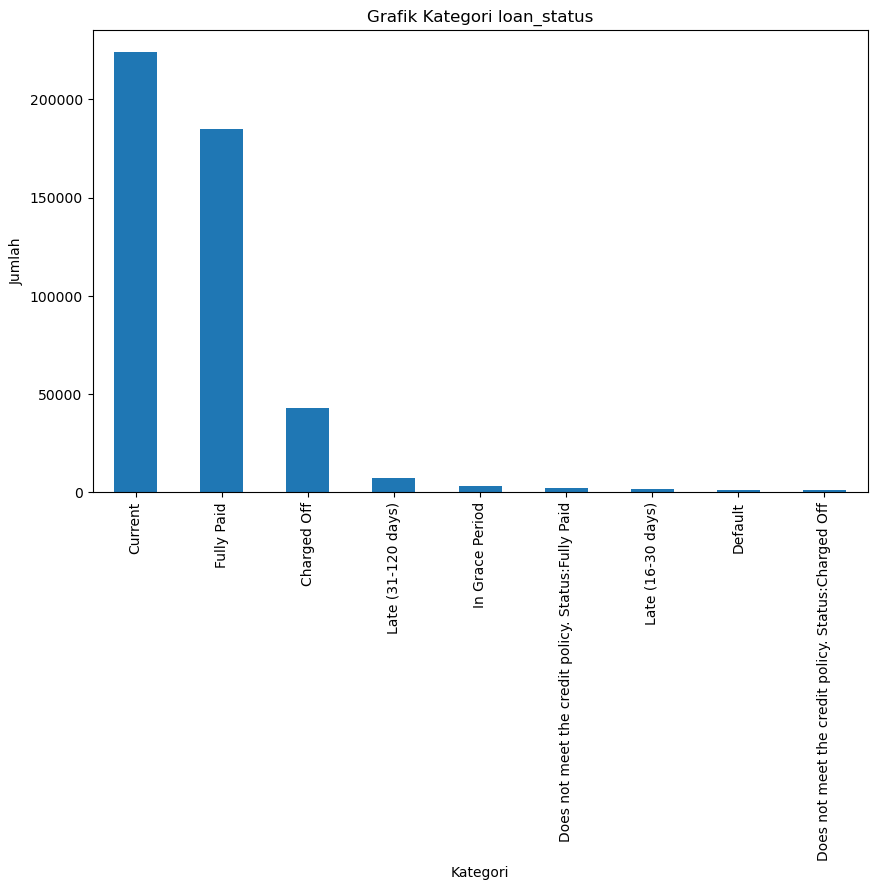

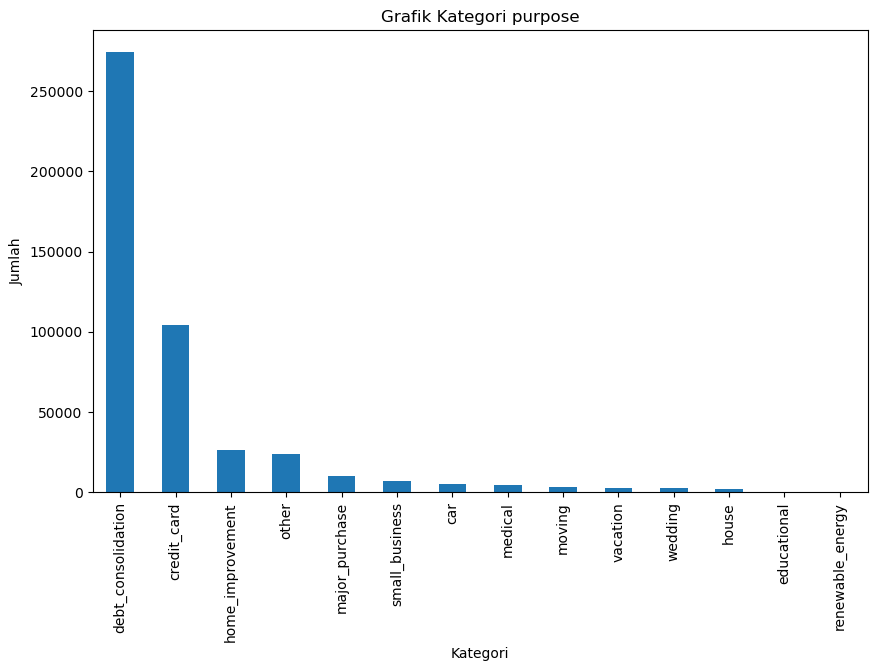

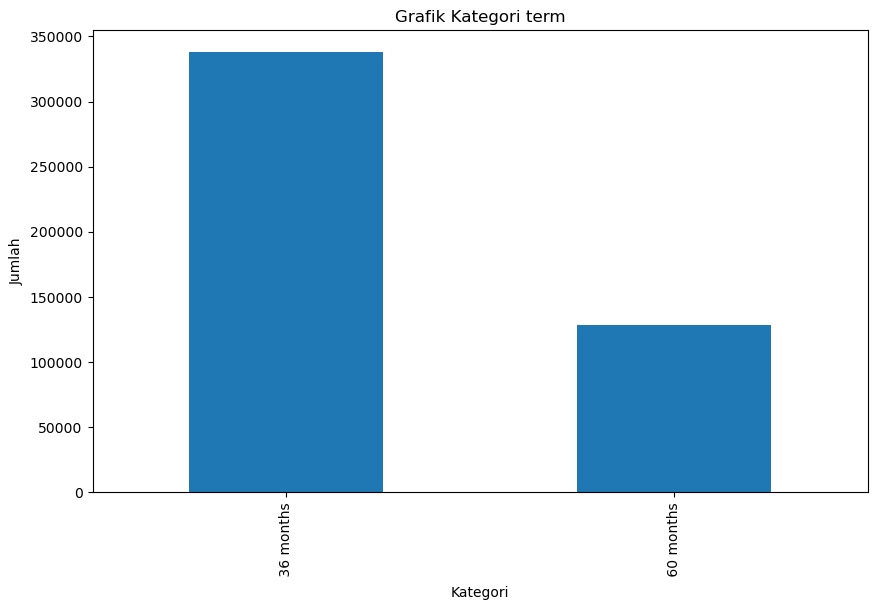

In [17]:
# Membuat grafik kategori untuk setiap kolom
for kolom in kolom_kategorikal.columns:
    plt.figure(figsize=(10, 6))
    kolom_plot = kolom_kategorikal[kolom].value_counts().plot(kind='bar')
    kolom_plot.set_title(f'Grafik Kategori {kolom}')
    kolom_plot.set_xlabel('Kategori')
    kolom_plot.set_ylabel('Jumlah')
    plt.show()


### Bivariate

#### Categorical & Categorical

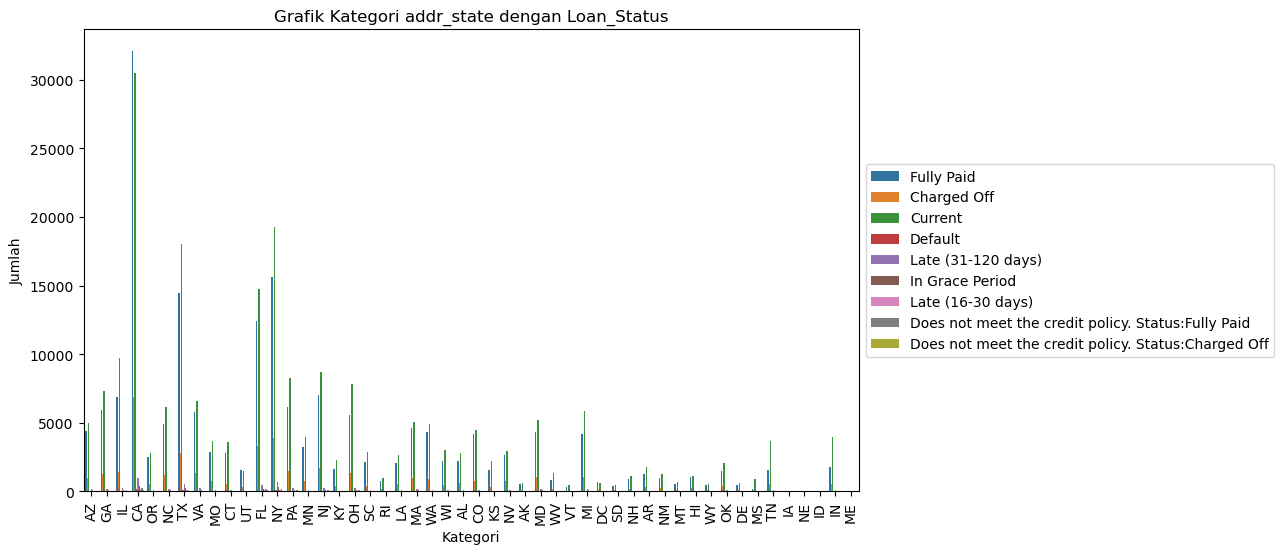

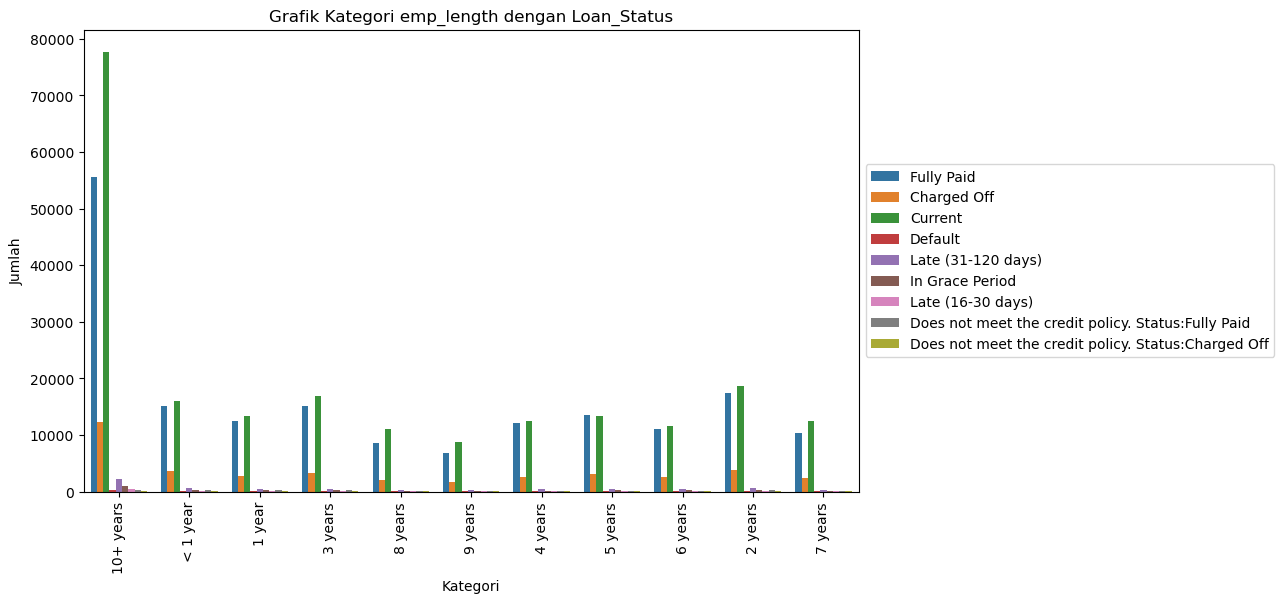

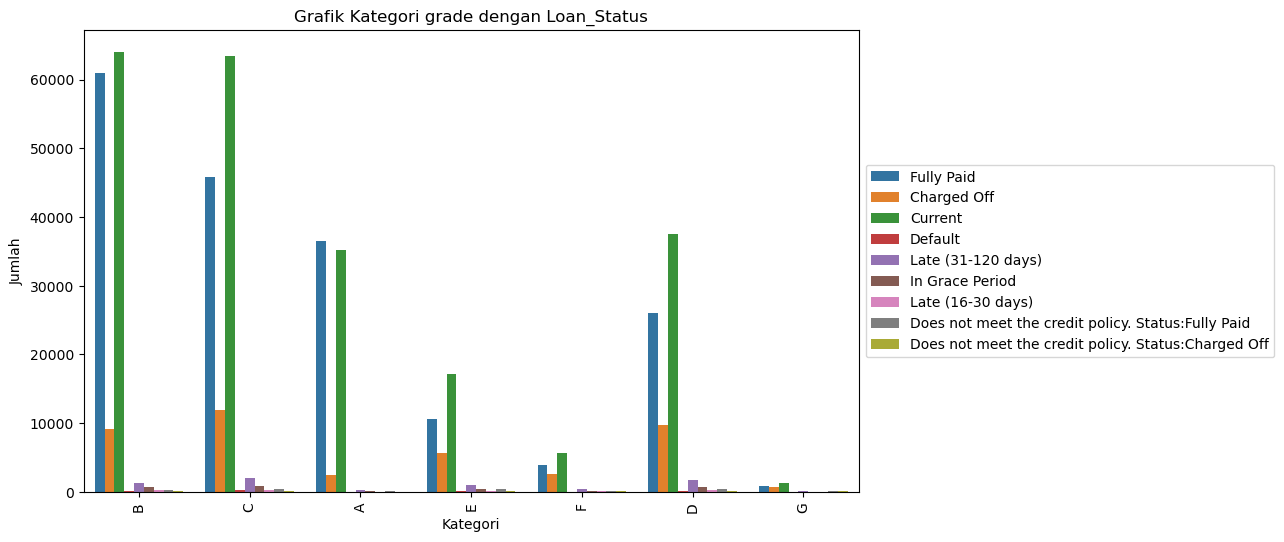

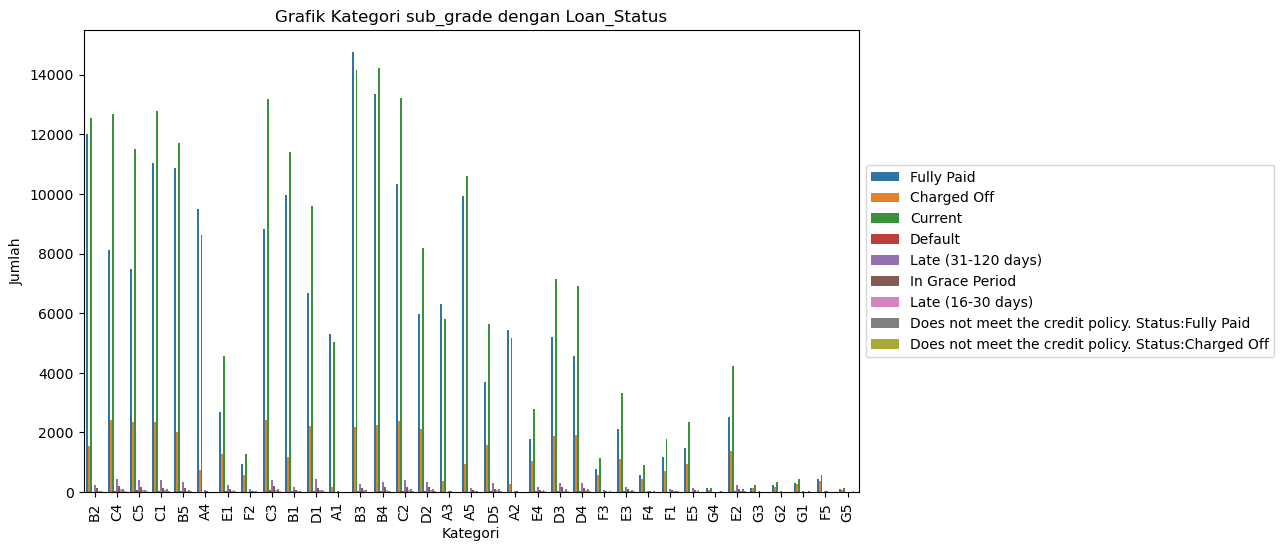

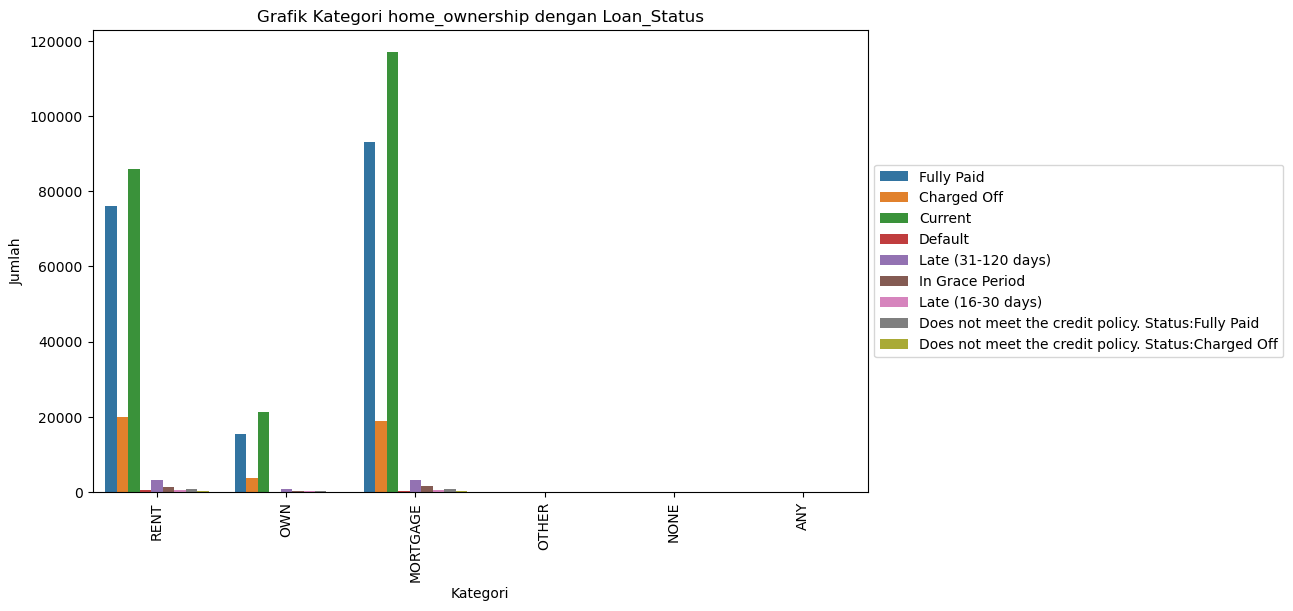

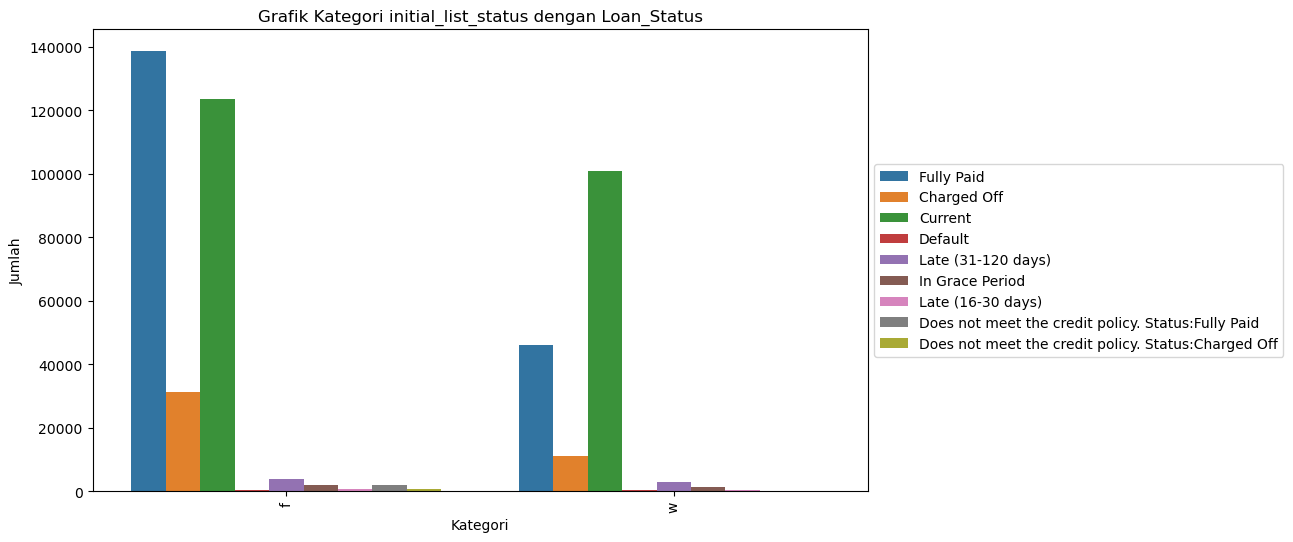

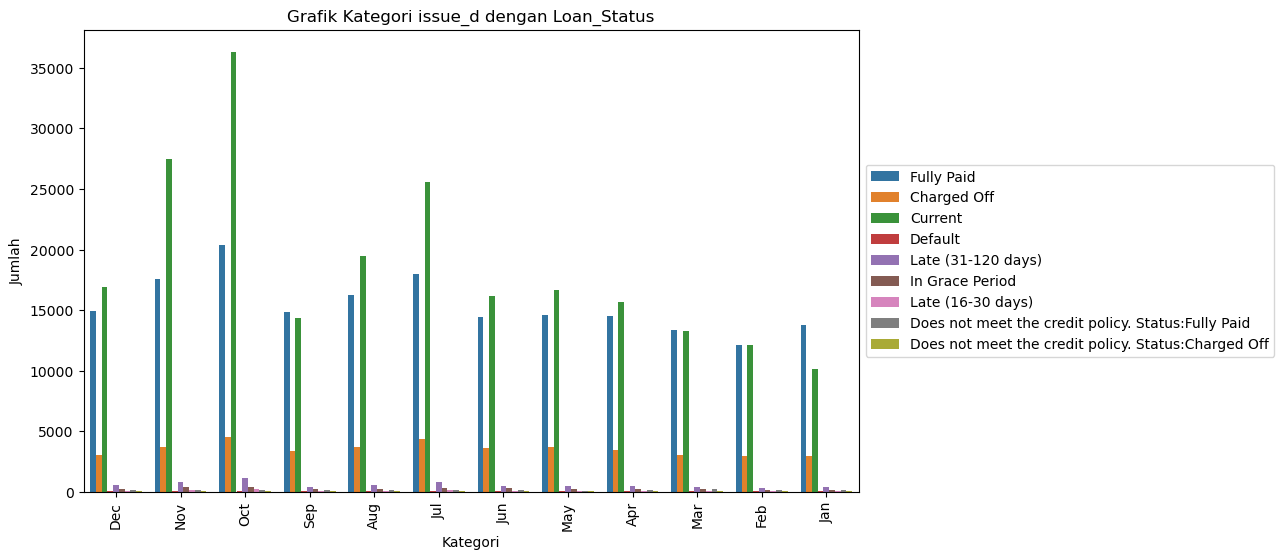

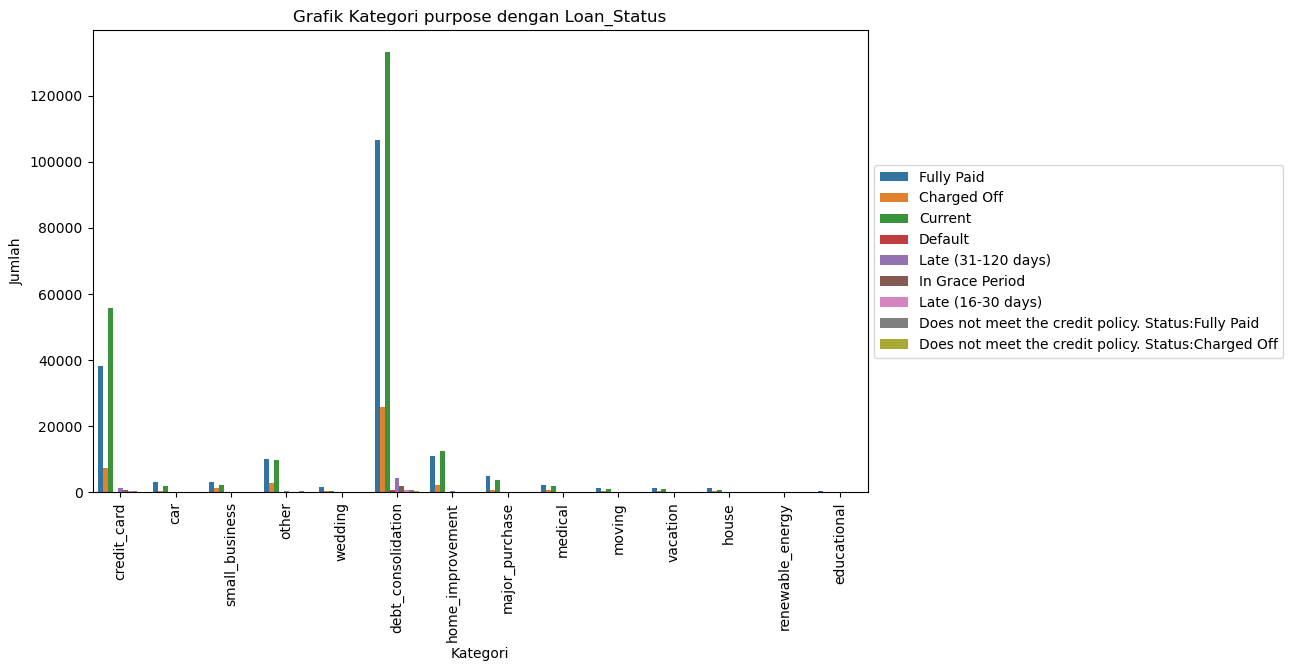

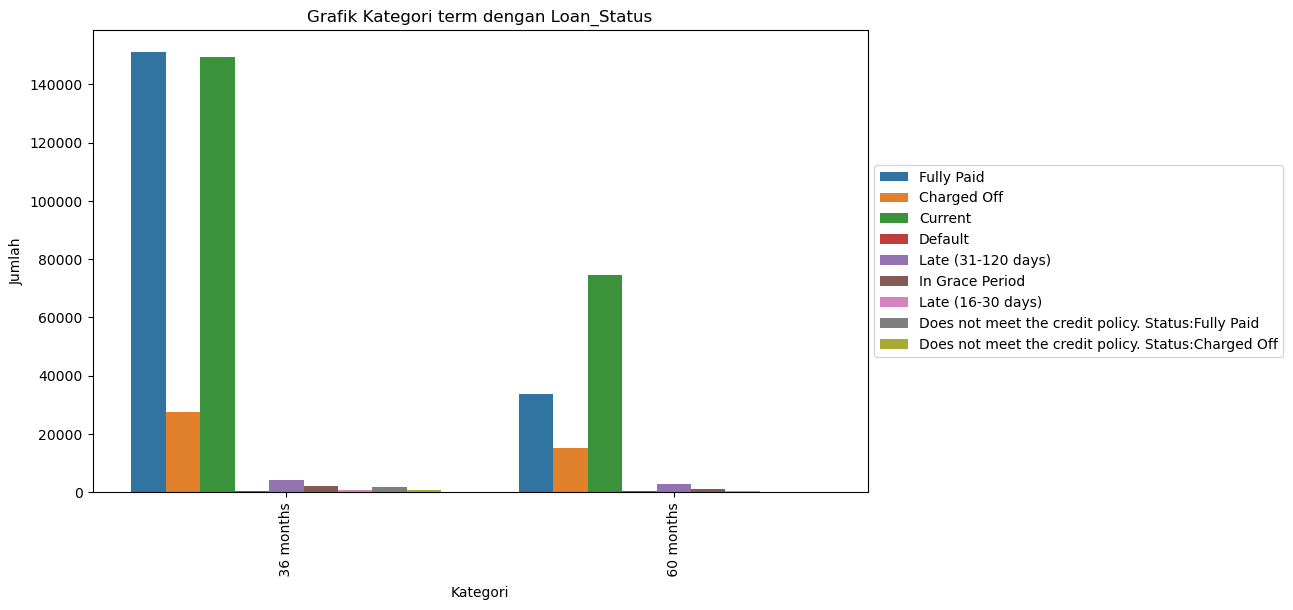

In [18]:
x = kolom_kategorikal.drop('loan_status', axis=1)
# Mengambil kolom-kolom lainnya
kolom_lainnya = x
hue_order = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off',
             'Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period']

for kolom in kolom_lainnya.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=kolom, data=kolom_kategorikal, hue='loan_status')
    plt.title(f'Grafik Kategori {kolom} dengan Loan_Status')
    plt.xlabel('Kategori')
    plt.ylabel('Jumlah')
    plt.xticks(rotation=90)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

#### Numeric & Numeric

/tmp/ipykernel_32/3504782998.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


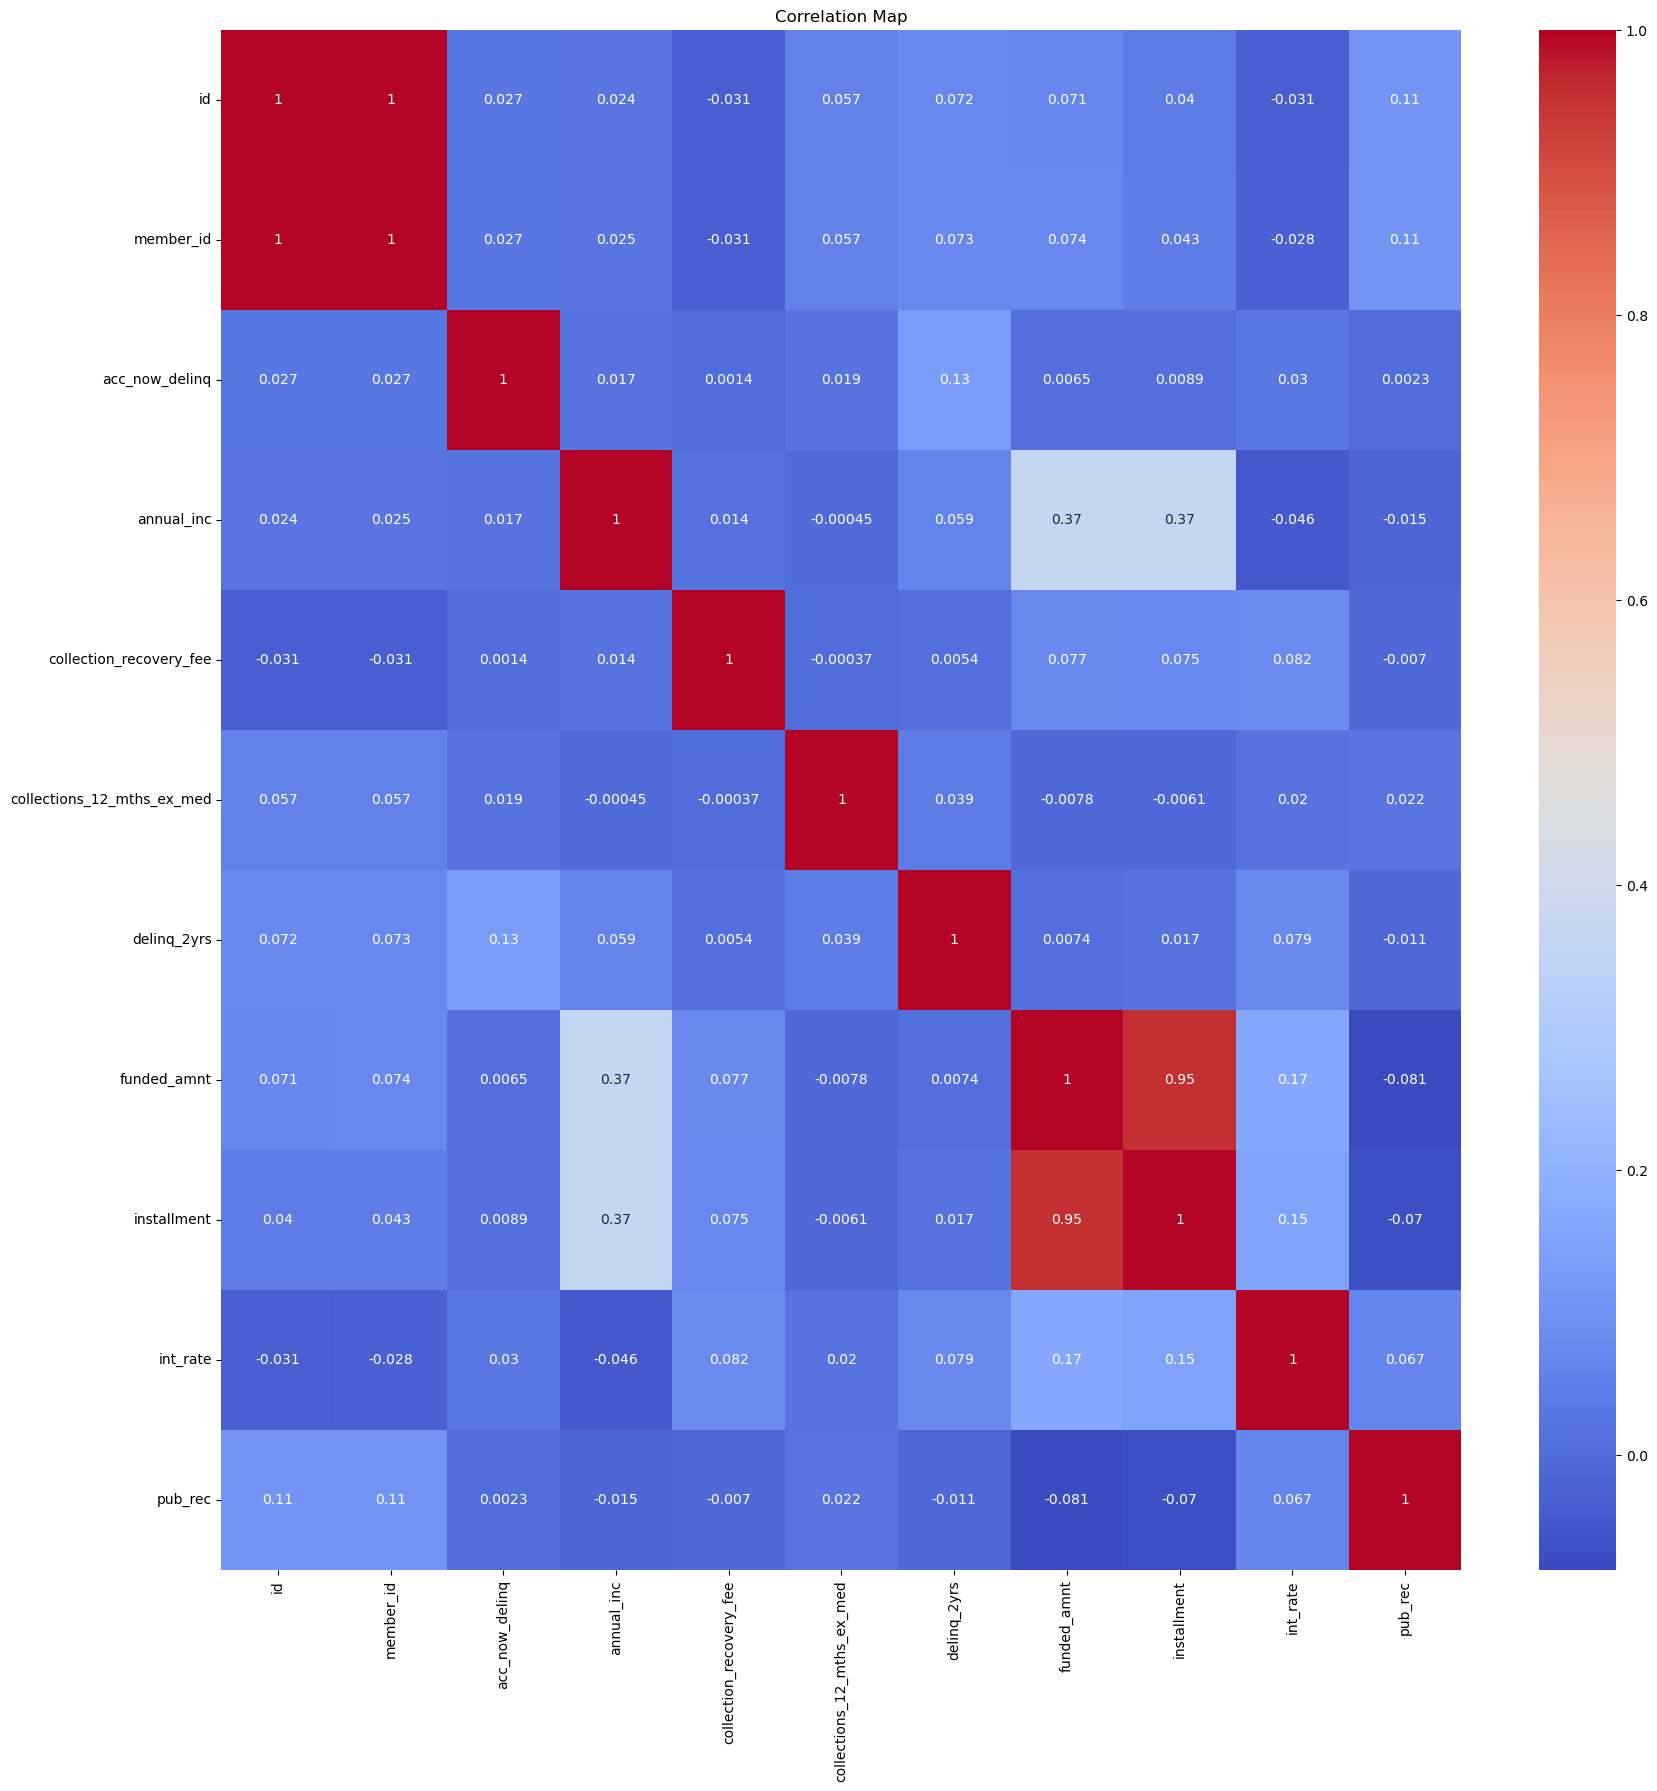

In [19]:
# Menghitung matriks korelasi
corr_matrix = df.corr()

# Membuat heatmap untuk matriks korelasi
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

#### Multivarite

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          466285 non-null  int64  
 1   member_id                   466285 non-null  int64  
 2   acc_now_delinq              466256 non-null  float64
 3   addr_state                  466285 non-null  object 
 4   annual_inc                  466281 non-null  float64
 5   application_type            466285 non-null  object 
 6   collection_recovery_fee     466285 non-null  float64
 7   collections_12_mths_ex_med  466140 non-null  float64
 8   delinq_2yrs                 466256 non-null  float64
 9   desc                        125983 non-null  object 
 10  emp_length                  445277 non-null  object 
 11  emp_title                   438697 non-null  object 
 12  funded_amnt                 466285 non-null  int64  
 13  grade         

In [21]:
kolom_numerik

,acc_now_delinq,annual_inc,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,funded_amnt,installment,int_rate,pub_rec
0,0.0,24000.0,0.00,0.0,0.0,5000,162.87,10.65,0.0
1,0.0,30000.0,1.11,0.0,0.0,2500,59.83,15.27,0.0
2,0.0,12252.0,0.00,0.0,0.0,2400,84.33,15.96,0.0
3,0.0,49200.0,0.00,0.0,0.0,10000,339.31,13.49,0.0
4,0.0,80000.0,0.00,0.0,0.0,3000,67.79,12.69,0.0
...,...,...,...,...,...,...,...,...,...
466280,0.0,110000.0,0.00,0.0,0.0,18400,432.64,14.47,0.0
466281,0.0,78000.0,0.00,0.0,0.0,22000,582.50,19.97,1.0
466282,0.0,46000.0,0.00,0.0,0.0,20700,514.34,16.99,0.0
466283,0.0,83000.0,0.00,0.0,3.0,2000,62.59,7.90,0.0


In [22]:
kolom_kategorikal

,addr_state,emp_length,grade,sub_grade,home_ownership,initial_list_status,issue_d,loan_status,purpose,term
0,AZ,10+ years,B,B2,RENT,f,Dec,Fully Paid,credit_card,36 months
1,GA,< 1 year,C,C4,RENT,f,Dec,Charged Off,car,60 months
2,IL,10+ years,C,C5,RENT,f,Dec,Fully Paid,small_business,36 months
3,CA,10+ years,C,C1,RENT,f,Dec,Fully Paid,other,36 months
4,OR,1 year,B,B5,RENT,f,Dec,Current,other,60 months
...,...,...,...,...,...,...,...,...,...,...
466280,TX,4 years,C,C2,MORTGAGE,w,Jan,Current,debt_consolidation,60 months
466281,TN,10+ years,D,D5,MORTGAGE,f,Jan,Charged Off,debt_consolidation,60 months
466282,OH,7 years,D,D1,MORTGAGE,f,Jan,Current,debt_consolidation,60 months
466283,CA,3 years,A,A4,OWN,w,Jan,Fully Paid,credit_card,36 months


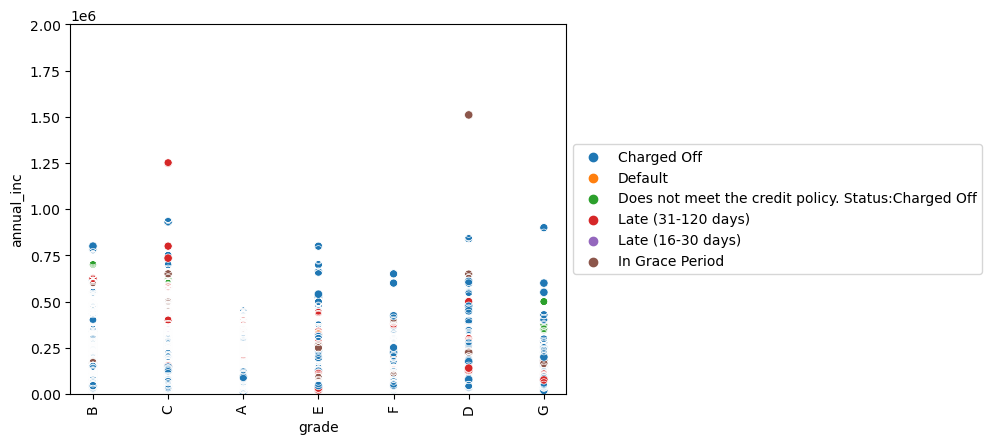

In [23]:
# Membuat scatter plot dengan hue berdasarkan kolom "category"
sns.scatterplot(data=df, x='grade', y='annual_inc', hue='loan_status',hue_order = hue_order)

# Menampilkan grafik
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.ylim(0, 2000000)
plt.show()

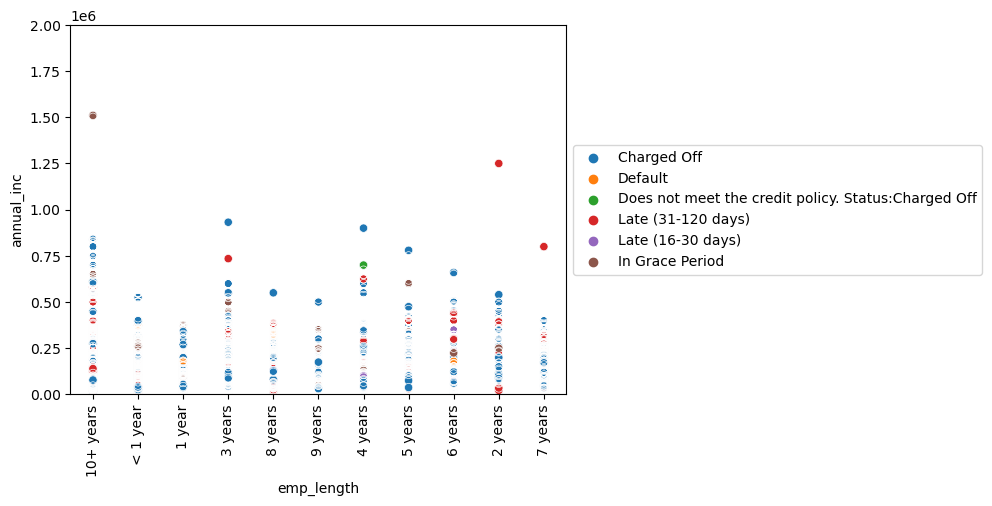

In [24]:
# Membuat scatter plot dengan hue berdasarkan kolom "category"
sns.scatterplot(data=df, x='emp_length', y='annual_inc', hue='loan_status',hue_order = hue_order)

# Menampilkan grafik
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.ylim(0, 2000000)
plt.show()

# Feature Engineering

## segmentasi wilayah

In [25]:
df['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [26]:
# Data array berisi kode negara
data = df['addr_state']

# Membuat dataframe dengan kolom 'addr_state' dari data array
s = pd.DataFrame(data, columns=['addr_state'])

# Fungsi untuk mengelompokkan kualitas negara berdasarkan kode negara
def get_quality(state):
    high_quality = ['CA', 'MA', 'WA', 'NY', 'VA']
    medium_quality = ['CO', 'OR', 'MN', 'UT', 'IL', 'WI', 'MD', 'CT', 'NJ']

    if state in high_quality:
        return 'Kualitas Tinggi'
    elif state in medium_quality:
        return 'Kualitas Menengah'
    else:
        return 'Kualitas Rendah'

# Membuat kolom baru 'Kualitas Negara' dengan menerapkan fungsi get_quality pada setiap baris kode negara
df['Kualitas_Negara'] = s['addr_state'].apply(get_quality)

In [27]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [28]:
# Fungsi untuk melakukan segmentasi kategori pinjaman
def segment_loan_purpose(purpose):
    personal_categories = ['credit_card', 'car', 'small_business', 'other']
    major_expense_categories = ['wedding', 'debt_consolidation', 'home_improvement', 'major_purchase']
    special_purpose_categories = ['medical', 'moving', 'vacation', 'house']

    if purpose in personal_categories:
        return 'Personal'
    elif purpose in major_expense_categories:
        return 'Major Expense'
    elif purpose in special_purpose_categories:
        return 'Special Purpose'
    else:
        return 'Other'

# Menambahkan kolom baru 'Segmented Purpose' yang melakukan segmentasi pada setiap baris data
df['Segmented Purpose'] = df['purpose'].apply(segment_loan_purpose)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          466285 non-null  int64  
 1   member_id                   466285 non-null  int64  
 2   acc_now_delinq              466256 non-null  float64
 3   addr_state                  466285 non-null  object 
 4   annual_inc                  466281 non-null  float64
 5   application_type            466285 non-null  object 
 6   collection_recovery_fee     466285 non-null  float64
 7   collections_12_mths_ex_med  466140 non-null  float64
 8   delinq_2yrs                 466256 non-null  float64
 9   desc                        125983 non-null  object 
 10  emp_length                  445277 non-null  object 
 11  emp_title                   438697 non-null  object 
 12  funded_amnt                 466285 non-null  int64  
 13  grade         

## Defining Label

In [30]:
# Daftar status yang akan diubah menjadi 0 (Current dan Fully Paid)
status_to_zero = ['Current', 'Fully Paid','Does not meet the credit policy. Status:Fully Paid']

# Mengganti status menjadi 0 atau 1 berdasarkan kondisi
df['loan_status'] = df['loan_status'].replace(status_to_zero, 0)
df['loan_status'] = df['loan_status'].replace({status: 1 for status in df['loan_status'].unique() if status != 0})

## Handling Date Column

In [31]:
df['issue_d']= df['issue_d'].str[:3]

## Drop Column

In [32]:
drop = ['addr_state','purpose']
df = df.drop(drop, axis=1)

### Drop High Cardinality

In [33]:
drop = ['desc','url','emp_title','title','zip_code']
df = df.drop(drop, axis=1)

### Drop Low Cardinality

In [34]:
drop = ['application_type']
df = df.drop(drop, axis=1)

### Drop Columns Identity

In [35]:
drop = ['member_id','id']
df = df.drop(drop, axis=1)

### Drop Redundant Columns

In [36]:
drop = ['sub_grade','funded_amnt']
df = df.drop(drop, axis=1)

### Drop Null Values

In [37]:
df.dropna(subset=['emp_length'],axis=0, inplace=True)
df.dropna(subset=['collections_12_mths_ex_med'],axis=0, inplace=True)

### Drop Duplicate

In [38]:
df.drop_duplicates(inplace=True)

# Data Preprocessing

In [39]:
df.head(2)

,acc_now_delinq,annual_inc,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,emp_length,grade,home_ownership,initial_list_status,installment,int_rate,issue_d,loan_status,pub_rec,term,Kualitas_Negara,Segmented Purpose
0,0.0,24000.0,0.00,0.0,0.0,10+ years,B,RENT,f,162.87,10.65,Dec,0,0.0,36 months,Kualitas Rendah,Personal
1,0.0,30000.0,1.11,0.0,0.0,< 1 year,C,RENT,f,59.83,15.27,Dec,1,0.0,60 months,Kualitas Rendah,Personal


## Transformasi Data Numerik

In [40]:
data_skew = df.select_dtypes(include='number')

scaler = QuantileTransformer()
df[data_skew.columns] =scaler.fit_transform(df[data_skew.columns])


## Transformasi Data Categorical

### Label Encoding

In [41]:
def label_encoding_with_changes(data):
    encoder = LabelEncoder()
    encoded_data = encoder.fit_transform(data)
    mapping = {label: encoded_label for label, encoded_label in zip(data, encoded_data)}

    print("Original Value\t|\tEncoded Value")
    print("----------------|---------------")
    for label, encoded_label in mapping.items():
        print(f"{label}\t\t|\t{encoded_label}")

    return encoded_data


data = df['emp_length']
df['emp_length'] = label_encoding_with_changes(data)
data = df['grade']
df['grade'] = label_encoding_with_changes(data)
data = df['term']
df['term'] = label_encoding_with_changes(data)
data = df['Kualitas_Negara']
df['Kualitas_Negara'] = label_encoding_with_changes(data)

Original Value	|	Encoded Value
----------------|---------------
10+ years		|	1
< 1 year		|	10
1 year		|	0
3 years		|	3
8 years		|	8
9 years		|	9
4 years		|	4
5 years		|	5
6 years		|	6
2 years		|	2
7 years		|	7
Original Value	|	Encoded Value
----------------|---------------
B		|	1
C		|	2
A		|	0
E		|	4
F		|	5
D		|	3
G		|	6
Original Value	|	Encoded Value
----------------|---------------
 36 months		|	0
 60 months		|	1
Original Value	|	Encoded Value
----------------|---------------
Kualitas Rendah		|	1
Kualitas Menengah		|	0
Kualitas Tinggi		|	2


In [42]:
df['emp_length'].value_counts()

1     149822
2      41331
3      36572
10     36191
5      30764
0      29580
4      28007
7      26169
6      26103
8      22387
9      17879
Name: emp_length, dtype: int64

In [43]:
df['emp_length'] = df['emp_length'].replace({1: 10, 10: 1})

### One Hot-encoding

In [44]:
df.head(3)

,acc_now_delinq,annual_inc,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,emp_length,grade,home_ownership,initial_list_status,installment,int_rate,issue_d,loan_status,pub_rec,term,Kualitas_Negara,Segmented Purpose
0,0.0,0.019520,0.000000,0.0,0.0,10,1,RENT,f,0.093129,0.243243,Dec,0.0,0.0,0,1,Personal
1,0.0,0.056557,0.950594,0.0,0.0,1,2,RENT,f,0.010012,0.648481,Dec,1.0,0.0,1,1,Personal
2,0.0,0.000951,0.000000,0.0,0.0,10,2,RENT,f,0.023331,0.713441,Dec,0.0,0.0,0,0,Personal


In [45]:
x = df

In [46]:
x = x.select_dtypes(include='object')

In [47]:
df_encoded = pd.get_dummies(x, columns=x.columns)

In [48]:
df_encoded

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,initial_list_status_f,initial_list_status_w,issue_d_Apr,issue_d_Aug,issue_d_Dec,issue_d_Feb,issue_d_Jan,issue_d_Jul,issue_d_Jun,issue_d_Mar,issue_d_May,issue_d_Nov,issue_d_Oct,issue_d_Sep,Segmented Purpose_Major Expense,Segmented Purpose_Other,Segmented Purpose_Personal,Segmented Purpose_Special Purpose
0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
466281,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
466282,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
466283,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [49]:
df.head(3)

,acc_now_delinq,annual_inc,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,emp_length,grade,home_ownership,initial_list_status,installment,int_rate,issue_d,loan_status,pub_rec,term,Kualitas_Negara,Segmented Purpose
0,0.0,0.019520,0.000000,0.0,0.0,10,1,RENT,f,0.093129,0.243243,Dec,0.0,0.0,0,1,Personal
1,0.0,0.056557,0.950594,0.0,0.0,1,2,RENT,f,0.010012,0.648481,Dec,1.0,0.0,1,1,Personal
2,0.0,0.000951,0.000000,0.0,0.0,10,2,RENT,f,0.023331,0.713441,Dec,0.0,0.0,0,0,Personal


In [50]:
dataset = df.drop(df.select_dtypes(include='object').columns, axis=1)

In [51]:
dataset = pd.concat([dataset, df_encoded], axis=1)


In [52]:
dataset

,acc_now_delinq,annual_inc,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,emp_length,grade,installment,int_rate,loan_status,pub_rec,term,Kualitas_Negara,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,initial_list_status_f,initial_list_status_w,issue_d_Apr,issue_d_Aug,issue_d_Dec,issue_d_Feb,issue_d_Jan,issue_d_Jul,issue_d_Jun,issue_d_Mar,issue_d_May,issue_d_Nov,issue_d_Oct,issue_d_Sep,Segmented Purpose_Major Expense,Segmented Purpose_Other,Segmented Purpose_Personal,Segmented Purpose_Special Purpose
0,0.0,0.019520,0.000000,0.0,0.000000,10,1,0.093129,0.243243,0.0,0.000000,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.0,0.056557,0.950594,0.0,0.000000,1,2,0.010012,0.648481,1.0,0.000000,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.0,0.000951,0.000000,0.0,0.000000,10,2,0.023331,0.713441,0.0,0.000000,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.0,0.289871,0.000000,0.0,0.000000,10,2,0.410997,0.494995,0.0,0.000000,0,2,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.0,0.675175,0.000000,0.0,0.000000,0,1,0.013864,0.412412,0.0,0.000000,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0.0,0.862863,0.000000,0.0,0.000000,4,2,0.566199,0.590090,0.0,0.000000,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
466281,0.0,0.655155,0.000000,0.0,0.000000,10,3,0.755279,0.905906,1.0,0.926426,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
466282,0.0,0.252753,0.000000,0.0,0.000000,7,3,0.686101,0.765766,0.0,0.000000,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
466283,0.0,0.699700,0.000000,0.0,0.985485,3,0,0.011091,0.105105,0.0,0.000000,0,2,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


## Handling Imbalance

## Split Dataset

In [53]:
!pip install imblearn

In [54]:
X = dataset.drop('loan_status', axis=1)
y = dataset['loan_status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [55]:
y_train_resampled.value_counts()

0.0    274859
1.0    274859
Name: loan_status, dtype: int64

# Modeling

In [56]:
!pip install xgboost

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb


def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    #
    # score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    # print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    # print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def grafik_roc_auc(model):
    # predict probabilities of positive class for training and testing data
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # calculate ROC AUC score for training and testing data
    train_auc = roc_auc_score(y_train, y_train_prob)
    test_auc = roc_auc_score(y_test, y_test_prob)

    # calculate false positive rate and true positive rate for training and testing data
    train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
    test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

    # create dataframe to store ROC data
    roc_data = pd.DataFrame({
    'FPR (Train)': train_fpr,
    'TPR (Train)': train_tpr,
    'FPR (Test)': test_fpr,
    'TPR (Test)': test_tpr
    })

    # plot ROC curves for training and testing data
    plt.plot(train_fpr, train_tpr, label=f'Train ROC curve (AUC = {train_auc:.2f})')
    plt.plot(test_fpr, test_tpr, label=f'Test ROC curve (AUC = {test_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [58]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42)

ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
eval_classification(ada)

Accuracy (Test Set): 0.93
Precision (Test Set): 1.00
Recall (Test Set): 0.42
F1-Score (Test Set): 0.59
roc_auc (test-proba): 0.80
roc_auc (train-proba): 0.81


In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
eval_classification(rfc)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.99
Recall (Test Set): 0.42
F1-Score (Test Set): 0.59
roc_auc (test-proba): 0.78
roc_auc (train-proba): 1.00


In [60]:
import xgboost as xgb

# Buat model XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Latih model menggunakan data training
xgb_model.fit(X_train, y_train)

# Prediksi data testing
y_pred = xgb_model.predict(X_test)
eval_classification(xgb_model)

Accuracy (Test Set): 0.93
Precision (Test Set): 1.00
Recall (Test Set): 0.42
F1-Score (Test Set): 0.59
roc_auc (test-proba): 0.80
roc_auc (train-proba): 0.84


In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)



# Latih model menggunakan data training
gb_model.fit(X_train, y_train)

# Prediksi data testing
y_pred = gb_model.predict(X_test)
eval_classification(gb_model)

Accuracy (Test Set): 0.93
Precision (Test Set): 1.00
Recall (Test Set): 0.42
F1-Score (Test Set): 0.59
roc_auc (test-proba): 0.80
roc_auc (train-proba): 0.81


In [62]:
'''from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

gb_classifier = GradientBoostingClassifier()

# Daftar hyperparameter yang akan diuji
param_distributions = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Inisialisasi RandomizedSearch dengan model dan hyperparameter yang telah ditentukan
random_search = RandomizedSearchCV(estimator=gb_classifier, param_distributions=param_distributions, 
                                   scoring='roc_auc', n_iter=10, cv=5, random_state=42)

# Lakukan hyperparameter tuning menggunakan RandomizedSearch dengan data latih
random_search.fit(X_train, y_train)

# Cetak hasil hyperparameter tuning terbaik
print("Best Hyperparameters:", random_search.best_params_)
print("Best ROC AUC Score:", random_search.best_score_)

# Gunakan model terbaik untuk melakukan prediksi pada data uji
best_gb_classifier = random_search.best_estimator_
y_pred = best_gb_classifier.predict(X_test)

# Hitung ROC AUC Score pada data uji
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score on Test Data:", roc_auc)'''

'from sklearn.metrics import roc_auc_score\nfrom sklearn.model_selection import RandomizedSearchCV\n\ngb_classifier = GradientBoostingClassifier()\n\n# Daftar hyperparameter yang akan diuji\nparam_distributions = {\n    \'n_estimators\': np.arange(50, 201, 50),\n    \'learning_rate\': [0.01, 0.1, 0.5],\n    \'max_depth\': [3, 5, 7]\n}\n\n# Inisialisasi RandomizedSearch dengan model dan hyperparameter yang telah ditentukan\nrandom_search = RandomizedSearchCV(estimator=gb_classifier, param_distributions=param_distributions, \n                                   scoring=\'roc_auc\', n_iter=10, cv=5, random_state=42)\n\n# Lakukan hyperparameter tuning menggunakan RandomizedSearch dengan data latih\nrandom_search.fit(X_train, y_train)\n\n# Cetak hasil hyperparameter tuning terbaik\nprint("Best Hyperparameters:", random_search.best_params_)\nprint("Best ROC AUC Score:", random_search.best_score_)\n\n# Gunakan model terbaik untuk melakukan prediksi pada data uji\nbest_gb_classifier = random_se

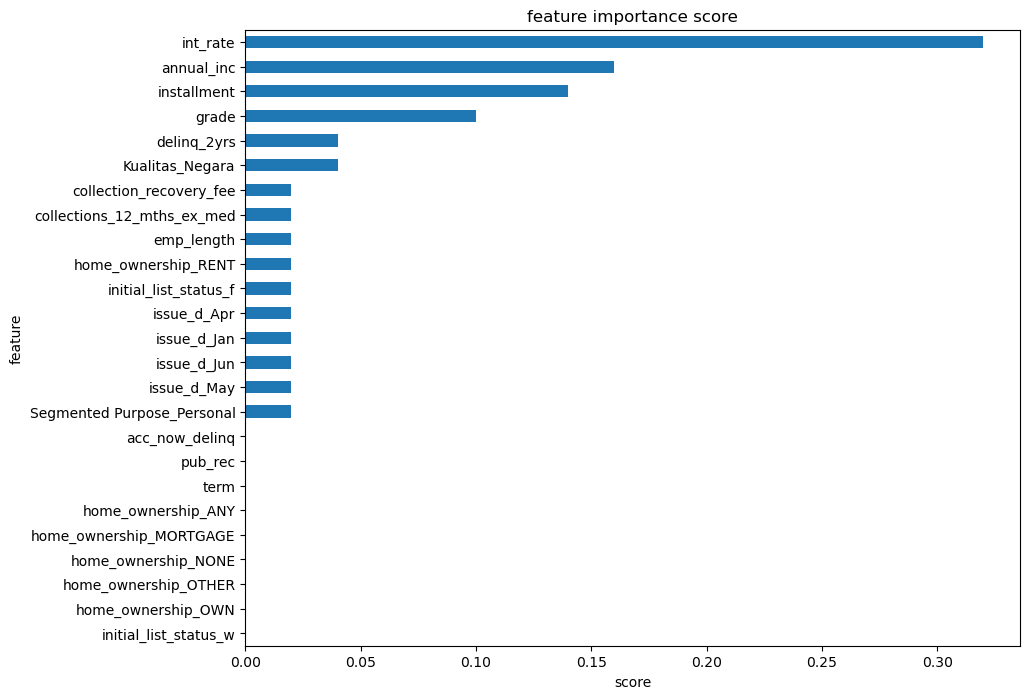

In [67]:
show_feature_importance(ada)

In [73]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42)

ada.fit(X, y)
df['predic'] = ada.predict(X)

In [74]:
df

,acc_now_delinq,annual_inc,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,emp_length,grade,home_ownership,initial_list_status,installment,int_rate,issue_d,loan_status,pub_rec,term,Kualitas_Negara,Segmented Purpose,predic
0,0.0,0.019520,0.000000,0.0,0.000000,10,1,RENT,f,0.093129,0.243243,Dec,0.0,0.000000,0,1,Personal,0.0
1,0.0,0.056557,0.950594,0.0,0.000000,1,2,RENT,f,0.010012,0.648481,Dec,1.0,0.000000,1,1,Personal,1.0
2,0.0,0.000951,0.000000,0.0,0.000000,10,2,RENT,f,0.023331,0.713441,Dec,0.0,0.000000,0,0,Personal,0.0
3,0.0,0.289871,0.000000,0.0,0.000000,10,2,RENT,f,0.410997,0.494995,Dec,0.0,0.000000,0,2,Personal,0.0
4,0.0,0.675175,0.000000,0.0,0.000000,0,1,RENT,f,0.013864,0.412412,Dec,0.0,0.000000,1,0,Personal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0.0,0.862863,0.000000,0.0,0.000000,4,2,MORTGAGE,w,0.566199,0.590090,Jan,0.0,0.000000,1,1,Major Expense,0.0
466281,0.0,0.655155,0.000000,0.0,0.000000,10,3,MORTGAGE,f,0.755279,0.905906,Jan,1.0,0.926426,1,1,Major Expense,0.0
466282,0.0,0.252753,0.000000,0.0,0.000000,7,3,MORTGAGE,f,0.686101,0.765766,Jan,0.0,0.000000,1,1,Major Expense,0.0
466283,0.0,0.699700,0.000000,0.0,0.985485,3,0,OWN,w,0.011091,0.105105,Jan,0.0,0.000000,0,2,Personal,0.0


In [91]:
x = df[['loan_status']]
x['predic'] = df['predic']

/tmp/ipykernel_32/976448357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['predic'] = df['predic']


In [92]:
x

,loan_status,predic
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
466280,0.0,0.0
466281,1.0,0.0
466282,0.0,0.0
466283,0.0,0.0


In [93]:
x[x['loan_status']==1].value_counts() 

loan_status  predic
1.0          0.0       30157
             1.0       22186
dtype: int64

In [94]:
x[x['loan_status']==0].value_counts()

loan_status  predic
0.0          0.0       392462
dtype: int64